# Lista 7
### Maria Nowacka 275981

In [70]:
import torch, torch.optim as optim, torch.nn as nn, numpy as np, matplotlib.pyplot as plt
from IPython.core.pylabtools import activate_matplotlib
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from collections import defaultdict

### zadanie 1
Instalacja i wstęp: Zainstaluj `PyTorch` lub `TensorFlow`. Wytwórz
proste tensory (lub tablice) i wykonaj na nich podstawowe operacje
(dodawanie, mnożenie, transpozycja).

In [71]:
a = torch.tensor([1, 2, 3])
print("a:", a)

b = torch.tensor([[1, 2], [3, 4]])
print("b:\n", b)

c = torch.zeros((2, 3))
print("c (zeros):\n", c)

d = torch.ones((3, 2))
print("d (ones):\n", d)

e = torch.rand((2, 2))
print("e (random):\n", e)

x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
print(f"{x} + {y} =", x + y)
print(f"{x} - {y} =", x - y)
print(f"{x} * {y} =", x * y)
print(f"{x} / {y} =", x / y)

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])
C = torch.matmul(A, B)
print(f"---------- \n{A} \n@ {B} =\n", C)

print(f"---------- \n{A}.T =\n", A.T)

a: tensor([1, 2, 3])
b:
 tensor([[1, 2],
        [3, 4]])
c (zeros):
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
d (ones):
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
e (random):
 tensor([[0.5842, 0.0180],
        [0.0742, 0.3900]])
tensor([1, 2, 3]) + tensor([4, 5, 6]) = tensor([5, 7, 9])
tensor([1, 2, 3]) - tensor([4, 5, 6]) = tensor([-3, -3, -3])
tensor([1, 2, 3]) * tensor([4, 5, 6]) = tensor([ 4, 10, 18])
tensor([1, 2, 3]) / tensor([4, 5, 6]) = tensor([0.2500, 0.4000, 0.5000])
---------- 
tensor([[1, 2],
        [3, 4]]) 
@ tensor([[5, 6],
        [7, 8]]) =
 tensor([[19, 22],
        [43, 50]])
---------- 
tensor([[1, 2],
        [3, 4]]).T =
 tensor([[1, 3],
        [2, 4]])


### zadanie 2
Budowa prostej sieci neuronowej: Stwórz model sztucznej sieci
neuronowej (ANN) z jedną warstwą wejściową, jedną ukrytą i jedną
wyjściową. Użyj danych syntetycznych, aby model nauczył się prostej
zależności regresyjnej (np. y = 2x + 1).

In [72]:
X = np.linspace(-5, 5, 100, dtype=np.float32).reshape(-1, 1)
Y = 2 * X + 1 + np.random.normal(0, 0.5, X.shape).astype(np.float32)

X_tensor = torch.from_numpy(X)
Y_tensor = torch.from_numpy(Y)

print(f"X shape: {X_tensor.shape}")
print(f"Y shape: {Y_tensor.shape}")

X shape: torch.Size([100, 1])
Y shape: torch.Size([100, 1])


In [73]:
class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleANN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)   # warstwa ukryta: 1 -> 10
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)   # warstwa wyjściowa: 10 -> 1

    def forward(self, out):
        out = self.hidden(out)
        out = self.relu(out)
        out = self.output(out)
        return out

input_size= 1
hidden_size = 10
output_size = 1
model = SimpleANN(input_size, hidden_size, output_size)
print(model)


SimpleANN(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)


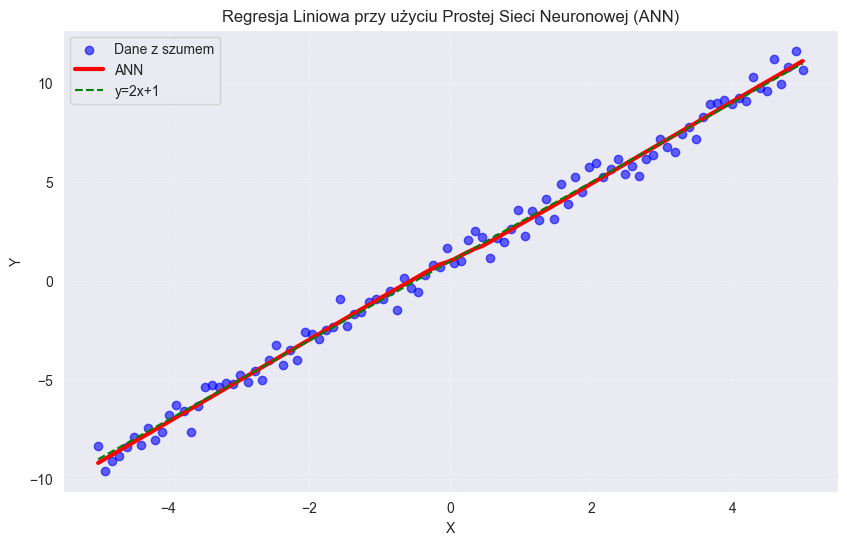

In [74]:
criterion = nn.MSELoss()          # błąd średniokwadratowy
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

epochs = 500

for epoch in range(epochs):
    predictions = model(X_tensor)
    loss = criterion(predictions, Y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = model(X_tensor).detach()
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Dane z szumem', color='blue', alpha=0.6)
plt.plot(X, y_pred, label='ANN', color='red', linewidth=3)
plt.plot(X, 2*X + 1, label='y=2x+1', color='green', linestyle='--')

plt.title('Regresja Liniowa przy użyciu Prostej Sieci Neuronowej (ANN)')
plt.xlabel('X');plt.ylabel('Y');plt.legend();plt.grid(True, linestyle=':', alpha=0.5);plt.show()

### zadanie 3
Funkcje aktywacji: Zmodyfikuj model z zadania 2, używając różnych funkcji aktywacji dla warstwy ukrytej (np. `ReLU`, `Sigmoid`, `Tanh`).
Porównaj, jak wybór funkcji aktywacji wpływa na proces uczenia i
ostateczne wyniki.

In [75]:
class SimpleANN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        super(SimpleANN2, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)   # warstwa ukryta: 1 -> 10
        if activation=='relu':
            self.activation = nn.ReLU()
        if activation=='sigmoid':
            self.activation = nn.Sigmoid()
        if activation=='tanh':
            self.activation = nn.Tanh()
        self.output = nn.Linear(hidden_size, output_size)   # warstwa wyjściowa: 10 -> 1

    def forward(self, out):
        out = self.hidden(out)
        out = self.activation(out)
        out = self.output(out)
        return out

model1 = SimpleANN2(input_size, hidden_size, output_size, activation='relu')
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
model2 = SimpleANN2(input_size, hidden_size, output_size, activation='sigmoid')
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
model3 = SimpleANN2(input_size, hidden_size, output_size, activation='tanh')
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)

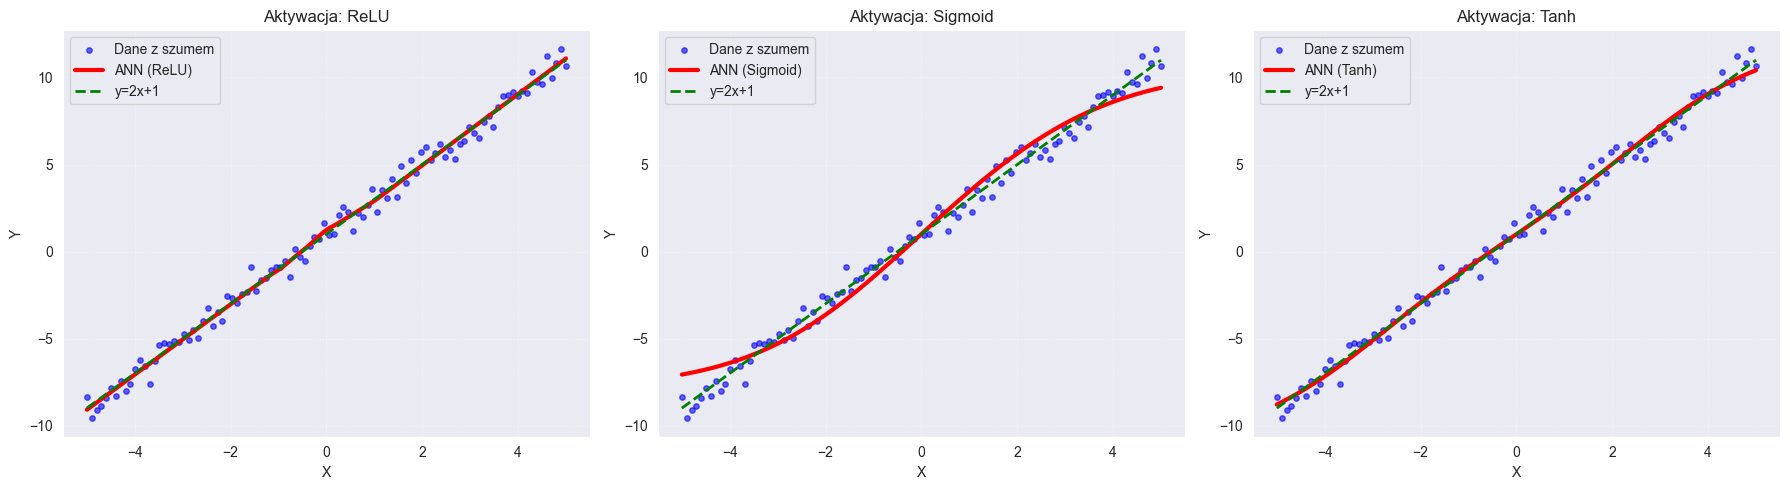

In [76]:
models = [model1, model2, model3]
optimizers = [optimizer1, optimizer2, optimizer3]
names = ['ReLU', 'Sigmoid', 'Tanh']
loss_histories = {name: [] for name in names}
for epoch in range(epochs):
    for i, model in enumerate(models):
        optimizer = optimizers[i]
        name = names[i]
        predictions = model(X_tensor)
        loss = criterion(predictions, Y_tensor)
        loss_histories[name].append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

y_pred1 = model1(X_tensor).detach()
y_pred2 = model2(X_tensor).detach()
y_pred3 = model3(X_tensor).detach()
y_preds = [y_pred1, y_pred2, y_pred3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes):
    name = names[i]
    y_pred = y_preds[i]
    ax.scatter(X, Y, label='Dane z szumem', color='blue', alpha=0.6, s=15)
    ax.plot(X, y_pred, label=f'ANN ({name})', color='red', linewidth=3)
    ax.plot(X, 2*X + 1, label='y=2x+1', color='green', linestyle='--', linewidth=2)
    ax.set_title(f'Aktywacja: {name}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

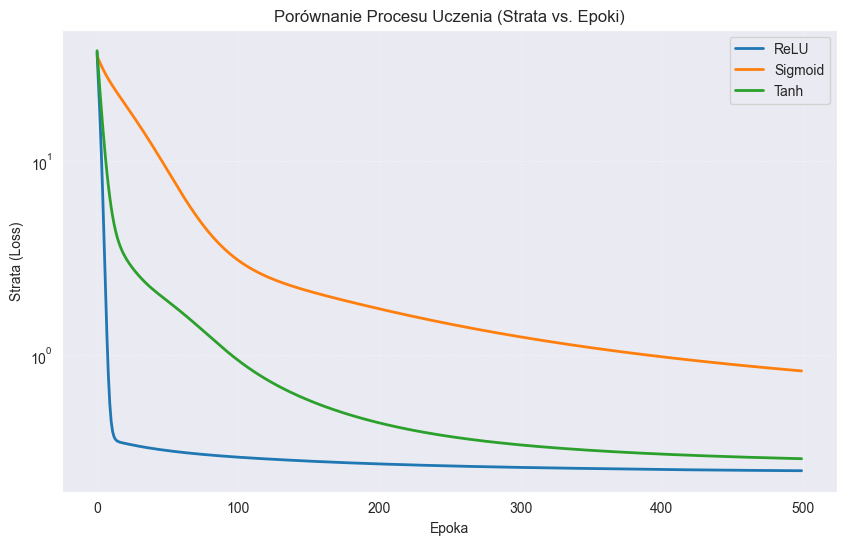

In [77]:
plt.figure(figsize=(10, 6))

for name, history in loss_histories.items():
    plt.plot(history, label=f'{name}', linewidth=2)

plt.title('Porównanie Procesu Uczenia (Strata vs. Epoki)')
plt.xlabel('Epoka')
plt.ylabel('Strata (Loss)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.yscale('log')
plt.show()

### zadanie 4
Funkcje straty i optymalizatory: Wykorzystaj model z zadania 2 i
przetestuj różne funkcje straty (`MSE` dla regresji, `Binary Cross-Entropy`
dla klasyfikacji) oraz optymalizatory (`SGD`, `Adam`). Zwizualizuj krzywą
uczenia (spadek błędu w czasie).

In [78]:
X = np.linspace(-5, 5, 100, dtype=np.float32).reshape(-1, 1)

Y_reg = 2 * X + 1 + np.random.normal(0, 0.5, X.shape).astype(np.float32)

Y_cls = (X > 0).astype(np.float32)

X_tensor = torch.from_numpy(X)
Y_reg_tensor = torch.from_numpy(Y_reg)
Y_cls_tensor = torch.from_numpy(Y_cls)


class SimpleANN_Reg(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)

    def forward(self, out):
        out = self.relu(self.hidden(out))
        return self.output(out)

class SimpleANN_Cls(nn.Module):
    # Model z Sigmoid na wyjściu (dla BCELoss)
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 10)
        self.activation = nn.ReLU()
        self.output = nn.Linear(10, 1)

    def forward(self, out):
        out = self.activation(self.hidden(out))
        # Aktywacja Sigmoid w warstwie wyjściowej dla klasyfikacji binarnej
        return torch.sigmoid(self.output(out))

epochs = 300
LR = 0.01

Konfiguracja 'Regresja (MSE) + SGD' - Final Loss: 0.2864
Konfiguracja 'Regresja (MSE) + Adam' - Final Loss: 0.2519
Konfiguracja 'Klasyfikacja (BCE) + SGD' - Final Loss: 0.1783
Konfiguracja 'Klasyfikacja (BCE) + Adam' - Final Loss: 0.0167


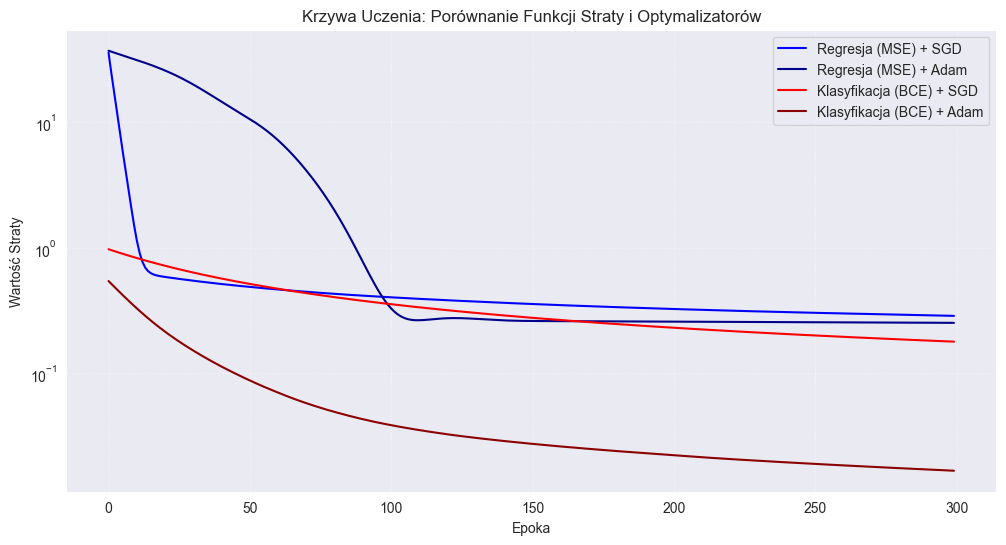

In [79]:
configs = [
    {'name': 'Regresja (MSE) + SGD', 'model': SimpleANN_Reg(), 'criterion': nn.MSELoss(), 'optimizer_class': torch.optim.SGD, 'Y_data': Y_reg_tensor, 'color': 'blue'},
    {'name': 'Regresja (MSE) + Adam', 'model': SimpleANN_Reg(), 'criterion': nn.MSELoss(), 'optimizer_class': torch.optim.Adam, 'Y_data': Y_reg_tensor, 'color': 'darkblue'},
    {'name': 'Klasyfikacja (BCE) + SGD', 'model': SimpleANN_Cls(), 'criterion': nn.BCELoss(), 'optimizer_class': torch.optim.SGD, 'Y_data': Y_cls_tensor, 'color': 'red'},
    {'name': 'Klasyfikacja (BCE) + Adam', 'model': SimpleANN_Cls(), 'criterion': nn.BCELoss(), 'optimizer_class': torch.optim.Adam, 'Y_data': Y_cls_tensor, 'color': 'darkred'},
]

loss_history = {}


for config in configs:
    model = config['model']
    criterion = config['criterion']
    optimizer = config['optimizer_class'](model.parameters(), lr=LR)
    Y_target = config['Y_data']
    name = config['name']

    current_loss_history = []

    for epoch in range(epochs):
        predictions = model(X_tensor)

        # BCELoss wymaga, aby dane były 1D
        if isinstance(criterion, nn.BCELoss):
             loss = criterion(predictions.squeeze(), Y_target.squeeze())
        else:
            loss = criterion(predictions, Y_target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        current_loss_history.append(loss.item())

    loss_history[name] = current_loss_history
    print(f"Konfiguracja '{name}' - Final Loss: {loss.item():.4f}")


plt.figure(figsize=(12, 6))

for name, history in loss_history.items():
    color = next(c['color'] for c in configs if c['name'] == name)
    plt.plot(history, label=name, color=color)

plt.title('Krzywa Uczenia: Porównanie Funkcji Straty i Optymalizatorów')
plt.xlabel('Epoka')
plt.ylabel('Wartość Straty')
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

### zadanie 5
Klasyfikacja binarnego problemu: Wczytaj zbiór danych `Breast
Cancer` i zbuduj prostą sieć neuronową do klasyfikacji binarnej. Użyj
odpowiedniej funkcji straty i funkcji aktywacji dla warstwy wyjściowej
(`sigmoid`). Oceń model, obliczając jego dokładność na zbiorze testowym.

Liczba cech wejściowych (input_size): 30

--- Macierz Pomyłek ---
[[41  1]
 [ 1 71]]

--- Pełny Raport Klasyfikacji ---
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



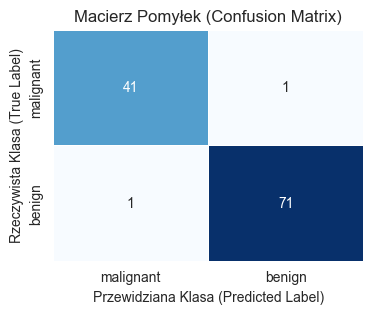

In [80]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Dodajemy wymiar (N, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

input_size= X_train.shape[1] # 30 cech

print(f"Liczba cech wejściowych (input_size): {input_size}")


class SimpleANN_Cls(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden = nn.Linear(input_size, 64) # Używamy 64 neuronów w ukrytej
        self.activation = nn.ReLU()
        self.output = nn.Linear(64, 1) # Wyjście binarne (1 neuron)

    def forward(self, out):
        out = self.activation(self.hidden(out))
        # Sigmoid: konwertuje wyjście na prawdopodobieństwo [0, 1]
        return torch.sigmoid(self.output(out)) 


model = SimpleANN_Cls(input_size)
# Funkcja straty dla klasyfikacji binarnej
criterion = nn.BCELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

epochs = 500

for epoch in range(epochs):
    model.train() # Ustawienie na tryb treningu
    
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()

with torch.no_grad():
    y_test_pred_proba = model(X_test_tensor)
    # Jeśli P > 0.5, to klasa 1; w przeciwnym razie klasa 0
    y_test_pred_class = (y_test_pred_proba >= 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred_class.numpy())
    y_true = y_test_tensor.numpy().flatten()

cm = confusion_matrix(y_true, y_test_pred_class)
print("\n--- Macierz Pomyłek ---")
print(cm)

print("\n--- Pełny Raport Klasyfikacji ---")
print(classification_report(y_true, y_test_pred_class, target_names=target_names))

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=.5,
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
)
plt.title('Macierz Pomyłek (Confusion Matrix)')
plt.ylabel('Rzeczywista Klasa (True Label)')
plt.xlabel('Przewidziana Klasa (Predicted Label)')
plt.show()

### zadanie 6
Overfitting i techniki regularizacji: Przeprowadź eksperyment, w
którym wytrenujesz „duży” model na małym zbiorze danych, aby spowodować przeuczenie. Zastosuj techniki regularyzacji, takie jak `dropout`
i `L2`, aby złagodzić ten problem. Porównaj krzywe treningowe (błąd na
zbiorze treningowym i walidacyjnym).

Rozmiar zbioru treningowego: 68
Rozmiar zbioru walidacyjnego: 228
1. Model Bazowy (Przeuczenie). Final Loss Treningowy: 0.0001, Final Loss Walidacyjny: 0.2337
2. Regularyzacja L2 (Weight Decay). Final Loss Treningowy: 0.0098, Final Loss Walidacyjny: 0.1391
3. Dropout. Final Loss Treningowy: 0.0006, Final Loss Walidacyjny: 0.4497


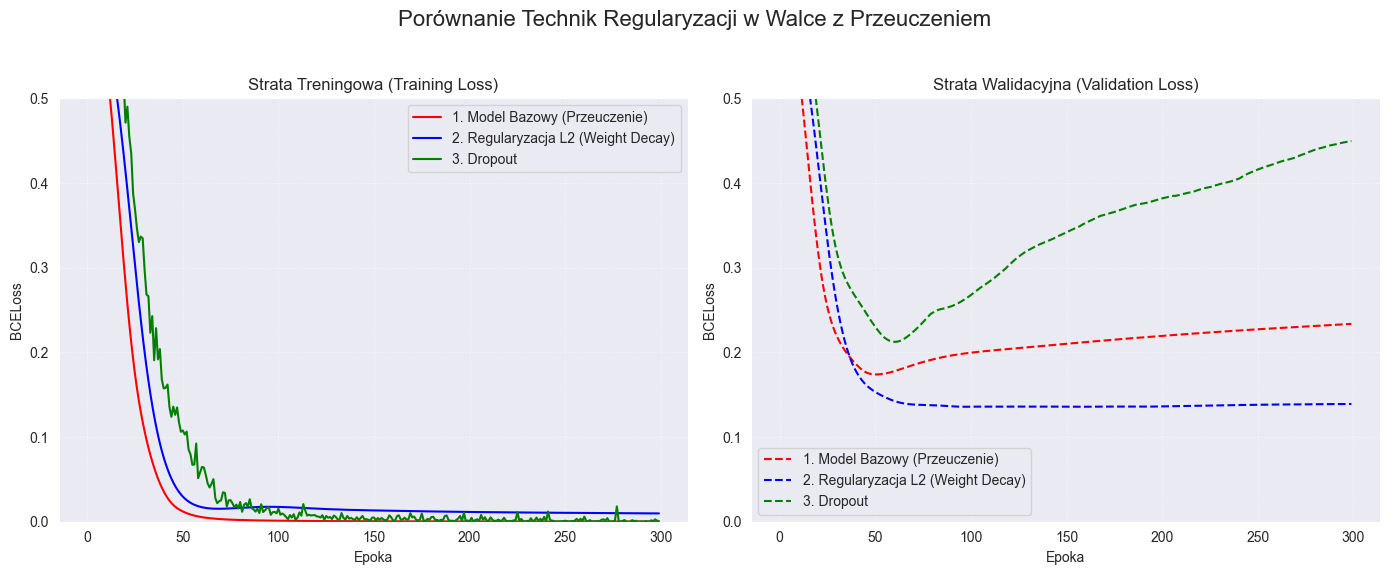

In [85]:
data = load_breast_cancer()
X = data.data
y = data.target

# Skalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_scaled, y, test_size=0.4 # 40% na walidację/test
)
X_train, _, y_train, _ = train_test_split(
    X_train_full, y_train_full, test_size=0.8  # TYLKO 20% DANYCH DO TRENINGU
)

# Konwersja na tensory
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

input_size = X_train.shape[1]
print(f"Rozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Rozmiar zbioru walidacyjnego: {X_val.shape[0]}")

class LargeANN(nn.Module):
    def __init__(self, input_size, use_dropout=False):
        super().__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()

        self.use_dropout = use_dropout
        if self.use_dropout:
            self.dropout1 = nn.Dropout(p=0.5)
            self.dropout2 = nn.Dropout(p=0.5)
            self.dropout3 = nn.Dropout(p=0.5)


    def forward(self, x):
        x = self.relu(self.layer1(x))
        if self.use_dropout:
            x = self.dropout1(x) # Zastosowanie po layer1

        x = self.relu(self.layer2(x))
        if self.use_dropout:
            x = self.dropout2(x) # Zastosowanie po layer2

        x = self.relu(self.layer3(x))
        if self.use_dropout:
            x = self.dropout3(x) # Zastosowanie po layer3
            
        # Sigmoid na wyjściu dla BCELoss
        return torch.sigmoid(self.output(x))


epochs = 300
LR = 0.001

# Konfiguracje do porównania
configs = [
    {
        'name': '1. Model Bazowy (Przeuczenie)',
        'model': LargeANN(input_size, use_dropout=False),
        'weight_decay': 0.0, # Brak L2
        'color': 'red'
    },
    {
        'name': '2. Regularyzacja L2 (Weight Decay)',
        'model': LargeANN(input_size, use_dropout=False),
        'weight_decay': 0.01, # Włączona regularyzacja L2
        'color': 'blue'
    },
    {
        'name': '3. Dropout',
        'model': LargeANN(input_size, use_dropout=True), # Włączony Dropout w modelu
        'weight_decay': 0.0,
        'color': 'green'
    },
]

history = defaultdict(lambda: {'train_loss': [], 'val_loss': []})
criterion = nn.BCELoss()

for config in configs:
    name = config['name']
    model = config['model']
    # Optymalizator Adam z parametrem weight_decay (regularyzacja L2)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=config['weight_decay'])

    for epoch in range(epochs):
        model.train()

        y_pred_train = model(X_train_t)
        train_loss = criterion(y_pred_train, y_train_t)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        history[name]['train_loss'].append(train_loss.item())

        model.eval() # Wyłączenie dropoutu na czas walidacji
        with torch.no_grad():
            y_pred_val = model(X_val_t)
            val_loss = criterion(y_pred_val, y_val_t)
            history[name]['val_loss'].append(val_loss.item())

    print(f"{name}. Final Loss Treningowy: {train_loss.item():.4f}, Final Loss Walidacyjny: {val_loss.item():.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Porównanie Technik Regularyzacji w Walce z Przeuczeniem', fontsize=16)

ax1 = axes[0]
for config in configs:
    name = config['name']
    color = config['color']
    ax1.plot(history[name]['train_loss'], label=name, color=color, linestyle='-')

ax1.set_title('Strata Treningowa (Training Loss)')
ax1.set_xlabel('Epoka')
ax1.set_ylabel('BCELoss')
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.set_ylim(0, 0.5) # Ograniczenie skali dla czytelności

ax2 = axes[1]
for config in configs:
    name = config['name']
    color = config['color']
    ax2.plot(history[name]['val_loss'], label=name, color=color, linestyle='--')

ax2.set_title('Strata Walidacyjna (Validation Loss)')
ax2.set_xlabel('Epoka')
ax2.set_ylabel('BCELoss')
ax2.legend()
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.set_ylim(0, 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()